In [8]:
import plotly
import sys; sys.path.append('../util')
from load_yelp_data import load_yelp_dataframe
# from load_yelp_data import restaurants_and_bars_in, train_test_split_reviews
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import graphlab as gl
import sklearn.metrics
%matplotlib inline

import plotly.plotly as py
from plotly.graph_objs import *
plotly.tools.set_credentials_file(username='ashilgard', api_key='hC2Wj4Gz6GCL4QnNIgSb')
from collections import defaultdict

In [10]:
import plotly.tools as tls
tls.embed('https://plot.ly/~cufflinks/8')
import plotly.plotly as py
import cufflinks as cf

ImportError: No module named cufflinks

In [12]:
businesses = load_yelp_dataframe('businesses').drop('Unnamed: 0', 1)
reviews = load_yelp_dataframe('reviews').drop('Unnamed: 0', 1)
users = load_yelp_dataframe('users').drop('Unnamed: 0', 1)
reviews['date']=pd.to_datetime(reviews.year*10000+reviews.month*100+reviews.day,format='%Y%m%d')

In [13]:
ratings_by_user_and_date = defaultdict(lambda: defaultdict(list))

for row in reviews[['user_id', 'date', 'stars']].itertuples():
    index, user_id, date, stars = row
    ratings_by_user_and_date[user_id][date].append(stars)

In [14]:
ratings_by_n_reviews = defaultdict(list)
numbers_of_reviews = []

for _user, ratings_by_date in ratings_by_user_and_date.items():
    for _date, ratings in ratings_by_date.items():
        numbers_of_reviews.append(len(ratings))
        ratings_by_n_reviews[len(ratings)] += ratings

In [17]:

import plotly.graph_objs as go
layout = go.Layout(
    title='Count of reviews given in a single day',
    xaxis=dict(
        title='Number of reviews given in a day'
    ),
    yaxis=dict(
        title='Instances'
    ),
#     barmode='overlay',
#     bargap=0.25,
#     bargroupgap=0.3
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)
data = [
    go.Histogram(
        x=numbers_of_reviews
    )
]
py.iplot(data)


# IPython notebook
# py.iplot(data, filename='pandas-bar-chart')

# url = py.plot(data, filename='pandas-bar-chart')

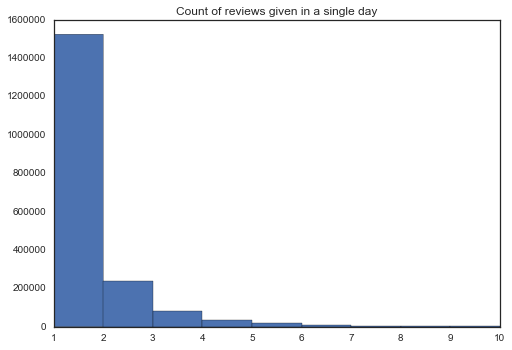

In [19]:
import seaborn as sns
sns.set_style("white")
plt.title('Count of reviews given in a single day')
plt.hist(numbers_of_reviews,bins=max(numbers_of_reviews)-1)
plt.xlim(1,10)
plt.show()

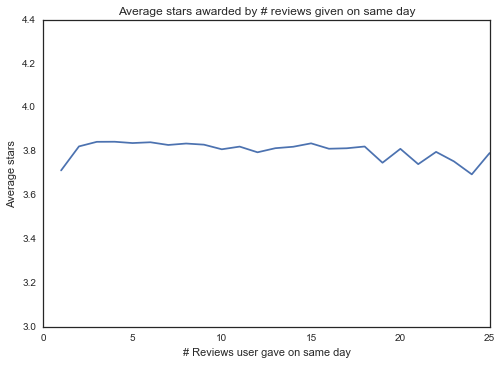

In [20]:
average_stars_by_n_reviews = np.array([[n, np.mean(stars)] for n, stars in ratings_by_n_reviews.items()])
plt.plot(*average_stars_by_n_reviews.T)
plt.xlim(0, 25)
plt.title('Average stars awarded by # reviews given on same day')
plt.ylabel('Average stars')
plt.xlabel('# Reviews user gave on same day')
plt.show()

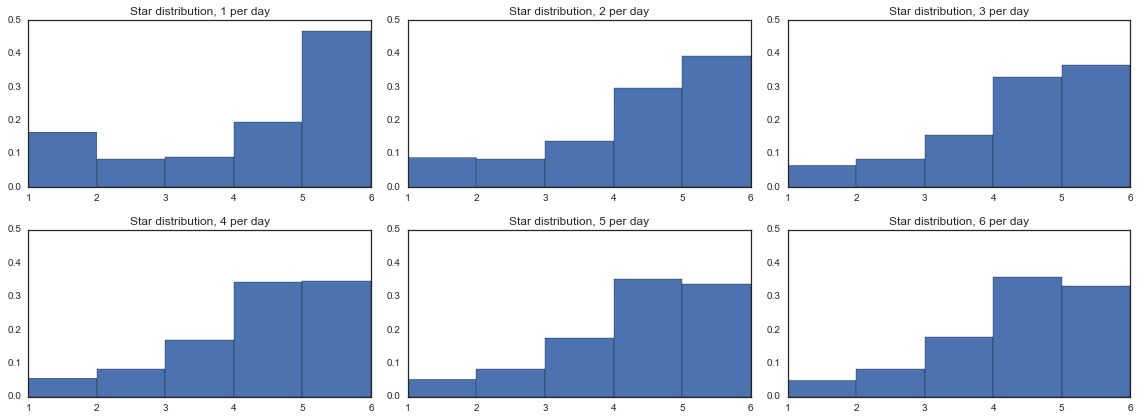

In [23]:
from figure_grid import figure_grid
with figure_grid(2,3,rowheight=3) as grid:
    for i, _axis in enumerate(grid.each_subplot(), 1):
        plt.title('Star distribution, {} per day'.format(i))
        plt.ylim((0,0.5))
        plt.hist(ratings_by_n_reviews[i], bins=range(1,7), normed=True)

In [49]:
ratings_by_n_reviews[1]
one_dist = []
two_dist = []
three_dist = []
four_dist = []
five_dist = []

one_dist.append(sum(1 for x in ratings_by_n_reviews[1] if (x==1))/float(len(ratings_by_n_reviews[1])))
two_dist.append(sum(1 for x in ratings_by_n_reviews[1] if (x==2))/float(len(ratings_by_n_reviews[1])))
three_dist.append(sum(1 for x in ratings_by_n_reviews[1] if (x==3))/float(len(ratings_by_n_reviews[1])))
four_dist.append(sum(1 for x in ratings_by_n_reviews[1] if (x==4))/float(len(ratings_by_n_reviews[1])))
five_dist.append(sum(1 for x in ratings_by_n_reviews[1] if (x==5))/float(len(ratings_by_n_reviews[1])))

one_dist.append(sum(1 for x in ratings_by_n_reviews[2] if (x==1))/float(len(ratings_by_n_reviews[2])))
two_dist.append(sum(1 for x in ratings_by_n_reviews[2] if (x==2))/float(len(ratings_by_n_reviews[2])))
three_dist.append(sum(1 for x in ratings_by_n_reviews[2] if (x==3))/float(len(ratings_by_n_reviews[2])))
four_dist.append(sum(1 for x in ratings_by_n_reviews[2] if (x==4))/float(len(ratings_by_n_reviews[2])))
five_dist.append(sum(1 for x in ratings_by_n_reviews[2] if (x==5))/float(len(ratings_by_n_reviews[2])))

one_dist.append(sum(1 for x in ratings_by_n_reviews[3] if (x==1))/float(len(ratings_by_n_reviews[3])))
two_dist.append(sum(1 for x in ratings_by_n_reviews[3] if (x==2))/float(len(ratings_by_n_reviews[3])))
three_dist.append(sum(1 for x in ratings_by_n_reviews[3] if (x==3))/float(len(ratings_by_n_reviews[3])))
four_dist.append(sum(1 for x in ratings_by_n_reviews[3] if (x==4))/float(len(ratings_by_n_reviews[3])))
five_dist.append(sum(1 for x in ratings_by_n_reviews[3] if (x==5))/float(len(ratings_by_n_reviews[3])))

one_dist.append(sum(1 for x in ratings_by_n_reviews[4] if (x==1))/float(len(ratings_by_n_reviews[4])))
two_dist.append(sum(1 for x in ratings_by_n_reviews[4] if (x==2))/float(len(ratings_by_n_reviews[4])))
three_dist.append(sum(1 for x in ratings_by_n_reviews[4] if (x==3))/float(len(ratings_by_n_reviews[4])))
four_dist.append(sum(1 for x in ratings_by_n_reviews[4] if (x==4))/float(len(ratings_by_n_reviews[4])))
five_dist.append(sum(1 for x in ratings_by_n_reviews[4] if (x==5))/float(len(ratings_by_n_reviews[4])))

one_dist.append(sum(1 for x in ratings_by_n_reviews[5] if (x==1))/float(len(ratings_by_n_reviews[5])))
two_dist.append(sum(1 for x in ratings_by_n_reviews[5] if (x==2))/float(len(ratings_by_n_reviews[5])))
three_dist.append(sum(1 for x in ratings_by_n_reviews[5] if (x==3))/float(len(ratings_by_n_reviews[5])))
four_dist.append(sum(1 for x in ratings_by_n_reviews[5] if (x==4))/float(len(ratings_by_n_reviews[5])))
five_dist.append(sum(1 for x in ratings_by_n_reviews[5] if (x==5))/float(len(ratings_by_n_reviews[5])))

one_dist.append(sum(1 for x in ratings_by_n_reviews[6] if (x==1))/float(len(ratings_by_n_reviews[6])))
two_dist.append(sum(1 for x in ratings_by_n_reviews[6] if (x==2))/float(len(ratings_by_n_reviews[6])))
three_dist.append(sum(1 for x in ratings_by_n_reviews[6] if (x==3))/float(len(ratings_by_n_reviews[6])))
four_dist.append(sum(1 for x in ratings_by_n_reviews[6] if (x==4))/float(len(ratings_by_n_reviews[6])))
five_dist.append(sum(1 for x in ratings_by_n_reviews[6] if (x==5))/float(len(ratings_by_n_reviews[6])))

In [50]:
one_dist
bottomthree = np.array(two_dist) + np.array(one_dist)
bottomfour = np.array(three_dist) + bottomthree
bottomfive = np.array(four_dist) + bottomfour

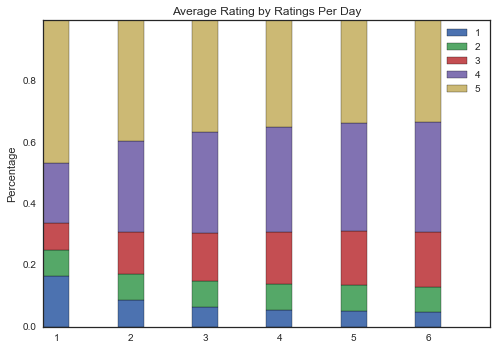

In [54]:
N = 6
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

deep=["#4C72B0", "#55A868", "#C44E52",
          "#8172B2", "#CCB974", "#64B5CD"],



p1 = plt.bar(ind, one_dist, width, color='#4C72B0')
p2 = plt.bar(ind, two_dist, width, 
             bottom=one_dist, color="#55A868" )
p3 = plt.bar(ind, three_dist, width,
             bottom=bottomthree, color="#C44E52")
p4 = plt.bar(ind, four_dist, width, 
             bottom=bottomfour, color = "#8172B2")
p5 = plt.bar(ind, five_dist, width, 
             bottom=bottomfive, color = "#CCB974")

plt.ylabel('Percentage')
plt.title('Average Rating by Ratings Per Day')
plt.xticks(ind + width/2., ('1', '2', '3', '4', '5','6'))
plt.yticks(np.arange(0, 1, .2))
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0]), ('1', '2', '3', '4', '5'))

plt.show()